# <center> Исследование данных HR агентства

## Постановка задачи

Необходимо выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
Кроме этого, необходимо ответить на следующие вопросы:
- наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

На каждый вопрос необходимо ответить с уровнем значимости $\alpha=0.05$.

## Описание признаков исследуемого датасета:
* **work_year** - год, в котором была выплачена зарплата.
* **experience_level** - опыт работы в должности в течение года. Значения (EN — Entry-level/Junior, MI — Mid-level/Intermediate, SE** — Senior-level/Expert, EX — Executive-level/Director)
* **employment_type** - тип трудоустройства для этой роли: (PT — неполный рабочий день; FT — полный рабочий день; CT — контракт; FL — фриланс)
* **job_title** - роль, в которой соискатель работал в течение года
* **salary** - общая выплаченная валовая сумма заработной платы
* **salary_currency** - валюта выплачиваемой заработной платы в виде кода валюты ISO 4217
* **salary_in_usd** - зарплата в долларах США (валютный курс, делённый на ср. значение курса $ США за соответствующий год через fxdata.foorilla.com)
* **employee_residence** - основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166
* **remote_ratio** - общий объём работы, выполняемой удалённо (0 — удалёнки нет (менее 20%), 50 — частичная удаленка, 100 — полная удалёнка (более 80%)
* **company_location** - страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
* **company_size** - среднее количество людей, работавших в компании в течение года (S — менее 50 сотрудников (небольшая компания), M — от 50 до 250,сотрудников (средняя компания), L — более 250 сотрудников (крупная компания).

## Загрузка данных

In [55]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [56]:
# загружаем датасет
data = pd.read_csv('ds_salaries.csv', index_col = 0)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [57]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


## Описательный анализ данных

In [58]:
data.info() ## получаем краткую описательную информацию по датасету

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


Относимость признаков по категориям:
- Числовые:
    - salary
    - salary_in_usd
- категориальные
    - work_year *(так как в датасете этот признак представлен 3 значениями (2020, 2021, 2022) целесообразно отнести его к категориальному)*
    - experience_level
    - employment_type
    - job_title
    - salary_currency
    - employee_residence
    - company_location
    - company_size

**Вывод:** Исследуемый датасет не имеет пропусков, значения признаков соотвествуют типам ячеек. В датасете 607 записей без пропущенных значений 

### Проверка данных на наличие полных дубликатов:

In [59]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты:
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 42
Размер таблицы после удаления дубликатов: (565, 11)


### Удаление неинформативных признаков:

In [60]:
data.drop(['salary', 'salary_currency', 'company_location'], axis= 1, inplace = True) # удаляем признаки датасета, которые врядли помогут при исследовании, несмотря на то что в них отсутсвуют пропуски

In [61]:
display(data)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,L
...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,M
603,2022,SE,FT,Data Engineer,126000,US,100,M
604,2022,SE,FT,Data Analyst,129000,US,0,M
605,2022,SE,FT,Data Analyst,150000,US,100,M


### Распределение заработной платы сотрудников в долларах

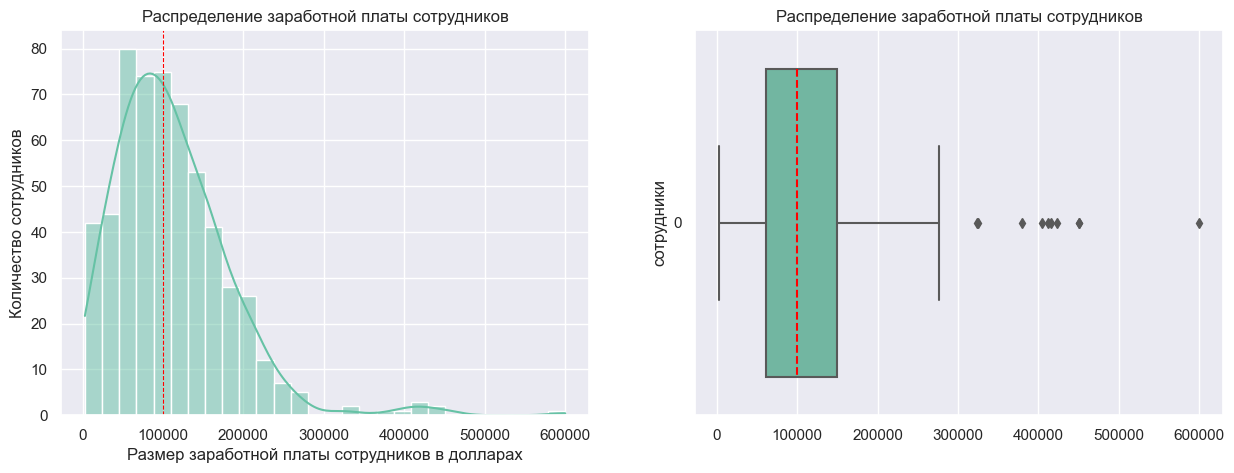

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер заработной платы сотрудников в долларах', ylabel='Количество сотрудников')
axes[0].set_title('Распределение заработной платы сотрудников')
axes[0].axvline(data['salary_in_usd'].median(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel= 'сотрудники')
axes[1].set_title('Распределение заработной платы сотрудников')

plt.show()

In [83]:
data_salary_usd_agg = data['salary_in_usd'].describe().round(2).to_frame()
data_salary_usd_agg.columns = ['статистические показатели ЗП']
data_salary_usd_agg

,статистические показатели ЗП
count,565.00
mean,110610.34
std,72280.70
min,2859.00
25%,60757.00
50%,100000.00
75%,150000.00
max,600000.00


Распределение заработной платы - нормальное. Наблюдается небольшой объем выбросов, но нельзя исключать, что и это реальные зарплаты, в самых топовых компаниях уникальным специалистам могут платить колоссальные деньги, тем более в сфере IT. Медианная заработная плата сотрудников составляет 100 000$, средняя ЗП - 110 610$, минимальные и максимальные - 2859 и 600000 соответственно.

### Изменение ежегодной заработной платы сотрудников

In [64]:
# фильтруем датасет по специальности 'Data Scientist'
job_filter_ds = data['job_title'] == 'Data Scientist'  
data_job_ds = data[job_filter_ds] # создаем новый датасет с применение фильтра
data_job_ds.head() # в новом датасете теперь только специальность - 'Data Scientist'

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,L
7,2020,MI,FT,Data Scientist,35735,HU,50,L
10,2020,EN,FT,Data Scientist,51321,FR,0,S
11,2020,MI,FT,Data Scientist,40481,IN,0,L
12,2020,EN,FT,Data Scientist,39916,FR,0,M


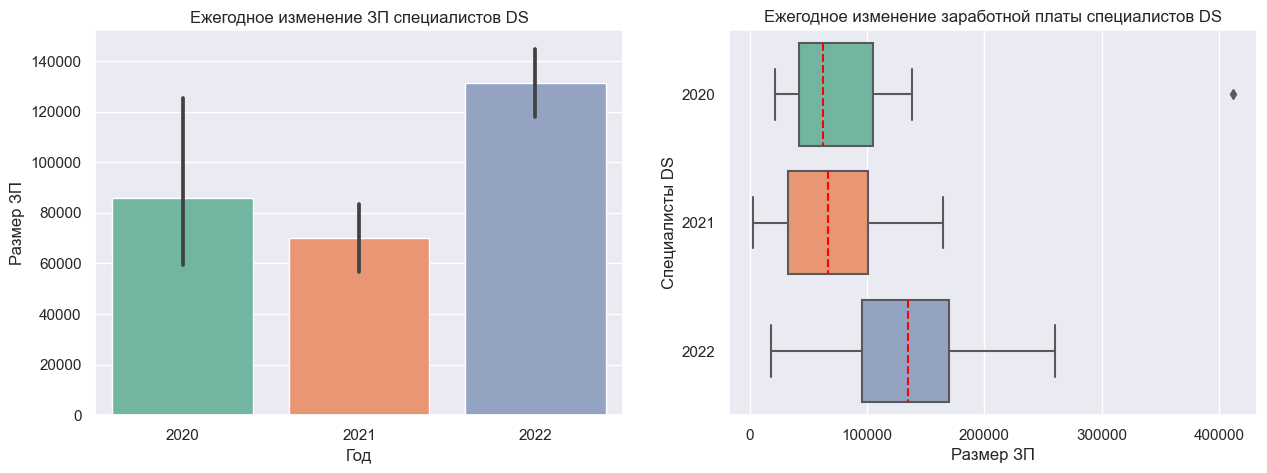

In [65]:
# Визуализируем изменение ЗП Data Scientist по годам
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data_job_ds, y = data_job_ds['salary_in_usd'], x = data_job_ds['work_year'], ax=axes[0])
axes[0].set(xlabel='Год', ylabel='Размер ЗП')
axes[0].set_title('Ежегодное изменение ЗП специалистов DS')

sns.boxplot(data_job_ds, x = 'salary_in_usd', y = 'work_year', ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Специалисты DS')
axes[1].set(xlabel='Размер ЗП')
axes[1].set_title('Ежегодное изменение заработной платы специалистов DS')

plt.show()

In [66]:
data_ds_agg = data_job_ds.groupby('work_year')['salary_in_usd'].describe().round(2) # выведем краткие статистические показатели
data_ds_agg

,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,85970.52,81436.65,21669.0,42197.00,62726.0,105000.00,412000.0
2021,44.0,70215.77,45843.82,2859.0,32793.75,67233.5,100922.75,165000.0
2022,65.0,131366.94,55785.24,18442.0,95550.00,135000.0,170000.00,260000.0


In [67]:
data_ds_median = data_job_ds.groupby('work_year')['salary_in_usd'].median().round(2) # выведем медианные показатели ежегодного роста ЗП
data_ds_median

work_year
2020     62726.0
2021     67233.5
2022    135000.0
Name: salary_in_usd, dtype: float64

**Вывод:** Учитывая ежегодное практически двухкратное увеличение количества наблюдаемых специалистов (2020 - 21, 2021 - 44, 2022 - 65), целесообразно исследовать медианный показатель ежегодного изменения ЗП (левый график в данном слуае неинформативен). В даном случае наблюдаем что показатели 2020 и 2021 года находятся на одном уровне, в 2022 наблюдается двухкратный рост медианного показателя ЗП, вероятно это обусловлено повышением спроса на специалистов DS и их востребованностью. Также необходимо учитывать, что с увеличенением стажа специалистов, происходит закономерный рост ЗП. 

### Соотношение заработной платы Data Engineer и Data Scientist в 2022 году

In [68]:
# создаем фильтр применительно к двум интересующим специальностям и тут же фильтруем по 2022 году
job_filter = ((data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')) & (data['work_year'] == 2022)  
data_job = data[job_filter] # создаем новый датасет с применение фильтра
data_job # в новом датасете теперь только две специальности: 'Data Scientist' и 'Data Engineer'
data_job.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size
289,2022,SE,FT,Data Engineer,135000,US,100,M
292,2022,MI,FT,Data Scientist,130000,US,0,M
293,2022,MI,FT,Data Scientist,90000,US,0,M
294,2022,MI,FT,Data Engineer,170000,US,100,M
295,2022,MI,FT,Data Engineer,150000,US,100,M


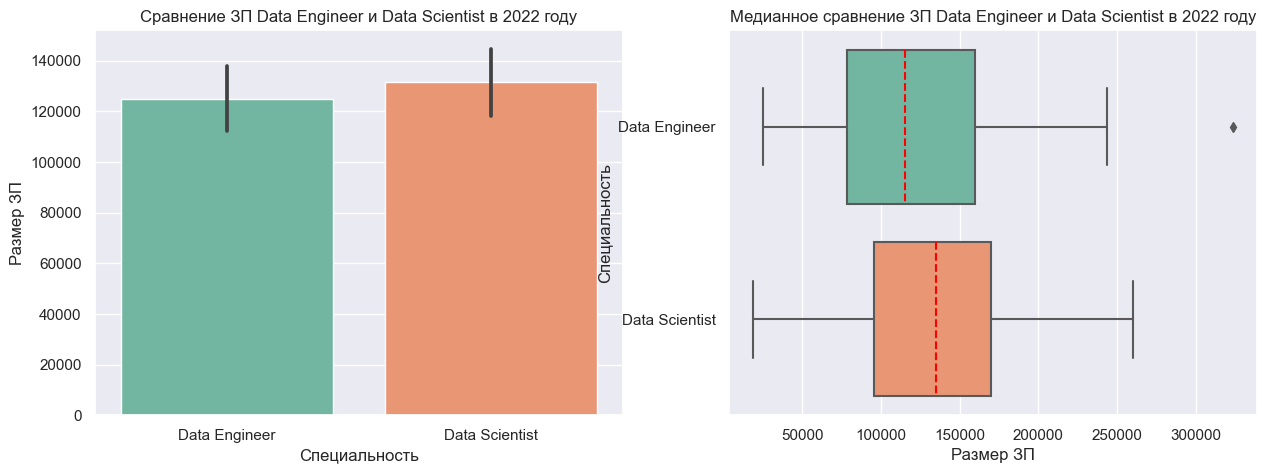

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data = data_job, x= 'job_title', y= 'salary_in_usd', ax=axes[0])
axes[0].set(xlabel='Специальность', ylabel='Размер ЗП')
axes[0].set_title('Сравнение ЗП Data Engineer и Data Scientist в 2022 году')

ax = sns.boxplot(data_job, x='salary_in_usd', y='job_title', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер ЗП', ylabel='Специальность')
plt.title('Медианное cравнение ЗП Data Engineer и Data Scientist в 2022 году')

plt.show()

In [70]:
data_job_agg = data_job.groupby('job_title')['salary_in_usd'].describe().round(2) # выведем краткие статистические показатели
data_job_agg

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,79.0,124651.78,57846.84,25000.0,78526.0,115000.0,160040.0,324000.0
Data Scientist,65.0,131366.94,55785.24,18442.0,95550.0,135000.0,170000.0,260000.0


**Вывод:** Визуальные и описательные статистики свидетельствуют о том, что Data Scientist'ы получают несколько бОльшую заработную плату чем Data Engineer'ы, кроме визуального представления, это подтверждается статистическими данными, приведенными в таблице выше.

### Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров

In [71]:
data_job_ds.head() # используем ранее отфильтрованный по специальности Data Scientist датасет  

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,L
7,2020,MI,FT,Data Scientist,35735,HU,50,L
10,2020,EN,FT,Data Scientist,51321,FR,0,S
11,2020,MI,FT,Data Scientist,40481,IN,0,L
12,2020,EN,FT,Data Scientist,39916,FR,0,M


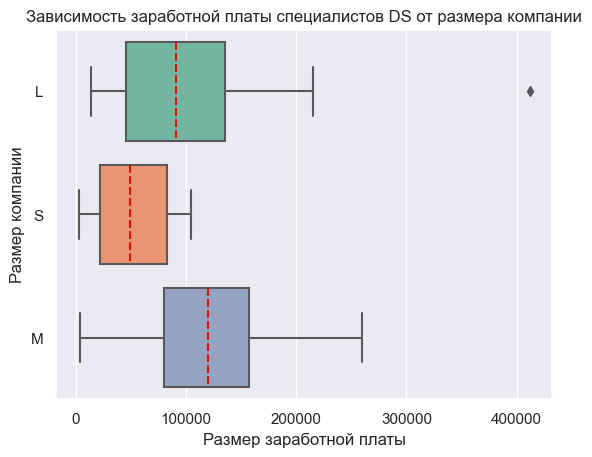

In [72]:
ax = sns.boxplot(data_job_ds, x = 'salary_in_usd', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер заработной платы', ylabel='Размер компании')
plt.title('Зависимость заработной платы специалистов DS от размера компании')
plt.show()

In [73]:
data_company_median = data_job_ds.groupby('company_size')['salary_in_usd'].median().round(2)
print('Медианные значения ЗП специалистов DS в зависимости от размера компании')
data_company_median

Медианные значения ЗП специалистов DS в зависимости от размера компании


company_size
L     90734.0
M    119529.5
S     49268.0
Name: salary_in_usd, dtype: float64

**Вывод:** Визуальные представление свидетельствует о том, что самые маленькие ЗП в небольших компаниях (S - до 50 человек), на втором месте компании со штатом более 250 человек (L) и самая высокая плата наблюдается в средних компаниях (M - от 50 до 250 человек) 

### Связь между наличием должностей Data Scientist и Data Engineer и размером компании

In [74]:
# Отфильтруем датасет по специальностям DS и DE
job_ds_de_filter = (data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer') 
data_ds_de = data[job_ds_de_filter] # создаем новый датасет с применение фильтра
data_ds_de.head() # в новом датасете теперь только две специальности: 'Data Scientist' и 'Data Engineer'

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,L
7,2020,MI,FT,Data Scientist,35735,HU,50,L
10,2020,EN,FT,Data Scientist,51321,FR,0,S
11,2020,MI,FT,Data Scientist,40481,IN,0,L
12,2020,EN,FT,Data Scientist,39916,FR,0,M


Построим график показывающий наличие должностей DS и DE в зависимости от размера компании

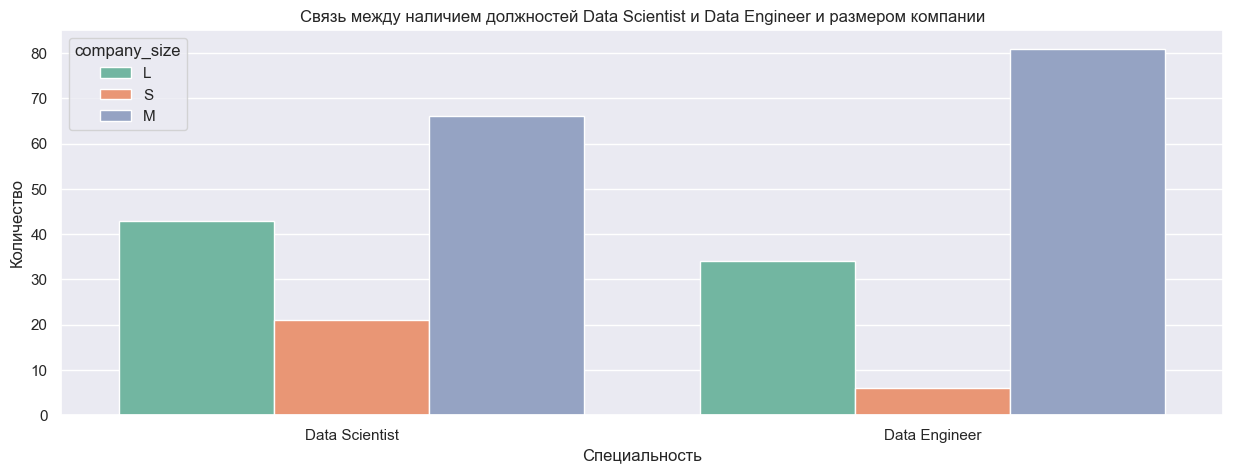

In [75]:
fig, axes = plt.subplots(figsize = (15, 5))

sns.countplot(data = data_ds_de, x = 'job_title', hue = 'company_size')
axes.set(xlabel='Специальность', ylabel='Количество')
axes.set_title('Связь между наличием должностей Data Scientist и Data Engineer и размером компании')


plt.show()

**Вывод:** На графиках видно, что самое большое количество DS и DE в средних компаниях - от 50 до 250 чел. (причем DE явно больше), на втором месте крупные компании - более 250 человек (и здесь уже больше DS) и самый маленький штат DS и DE в маленьких компаниях - до 50 человек (и здесь количество инженеров значительно меньше DS, не более 5 - 6 человек)

### *BONUS. Проведем несколько дополнительных исследований, вне рамок поставленных вопросов

1. Исследуем зависимость количества специалистов DS и DE в зависимости от способа выполнения работы (общий объём работы, выполняемой удалённо (0 — удалёнки нет (менее 20%), 50 — частичная удаленка, 100 — полная удалёнка (более 80%)

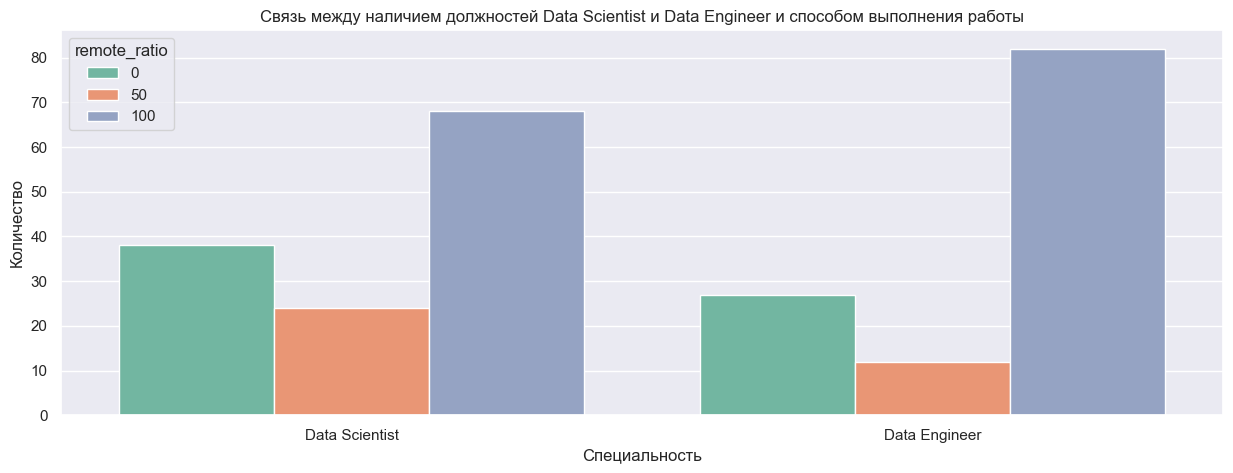

In [76]:
fig, axes = plt.subplots(figsize = (15, 5))

sns.countplot(data = data_ds_de, x = 'job_title', hue = 'remote_ratio')
axes.set(xlabel='Специальность', ylabel='Количество')
axes.set_title('Связь между наличием должностей Data Scientist и Data Engineer и способом выполнения работы')

plt.show()

**Вывод:** Итересен следующий факт -  количство дата сайентистов с отсутсвием удаленной работы, либо на частичной удаленке явно преоблададает нал дата инженерами, однако проигрывает им в показателе полной удаленной работы.

2. А теперь посмотрим на примере специалистов DS как влияет способ выполнения работы на заработную плату

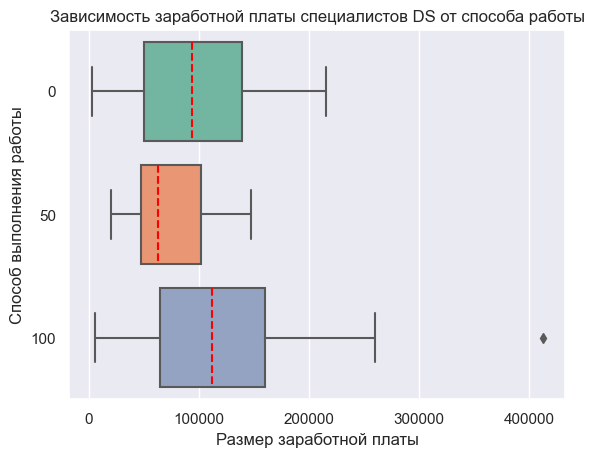

In [77]:
#data_job_ds - это ранее отфильрованный датасет по специальности "Data Scientist"

ax = sns.boxplot(data_job_ds, x = 'salary_in_usd', y='remote_ratio', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер заработной платы', ylabel='Способ выполнения работы')
plt.title('Зависимость заработной платы специалистов DS от способа работы')
plt.show()

**Вывод:** Медианное значение ЗП специалистов на удаленке несколько превышает остальные категории, при этом наименьшая медианная ЗП отмечается у специалистов на частичном удаленном графике

3. Интересно посмотреть в какой стране проживает наибольшее количество специалистов DS

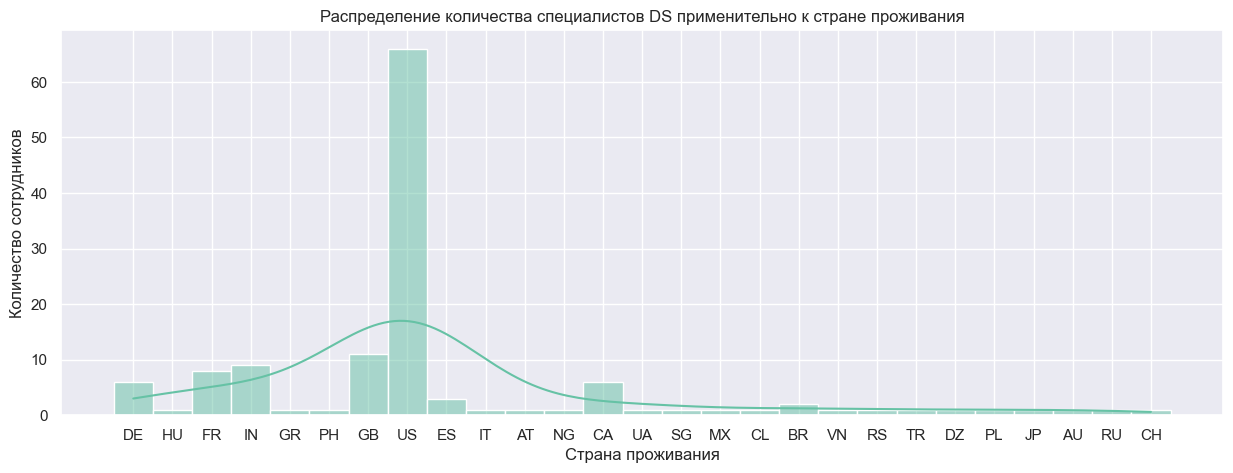

In [78]:
fig, axes = plt.subplots(figsize = (15, 5))

sns.histplot(data_job_ds['employee_residence'], kde=True, ax=axes)
axes.set(xlabel='Страна проживания', ylabel='Количество сотрудников')
axes.set_title('Распределение количества специалистов DS применительно к стране проживания')

plt.show()

**Вывод:** Явный лидер рейтина это США, затем Великобритания и замыкает тройку - Индия

4.  И исследуем еще один показатель - Зависимость ЗП специалистов DS от типа трудоустройства (employment_type: PT — неполный рабочий день; FT — полный рабочий день; CT — контракт; FL — фриланс)

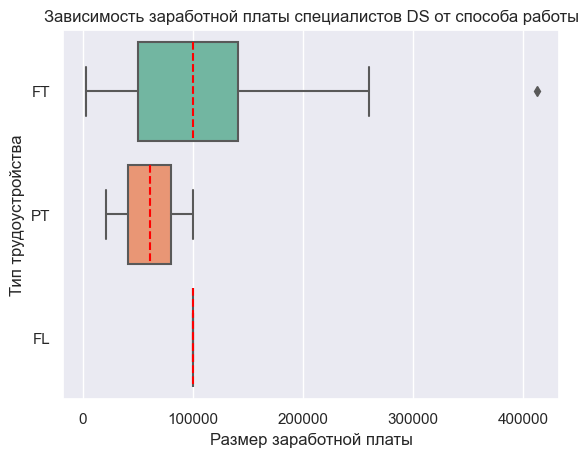

In [80]:
#data_job_ds - это ранее отфильрованный датасет по специальности "Data Scientist"

ax = sns.boxplot(data_job_ds, x = 'salary_in_usd', y='employment_type', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер заработной платы', ylabel='Тип трудоустройства')
plt.title('Зависимость заработной платы специалистов DS от типа трудоустройства')
plt.show()

Визуализация этой задачи не демонстрирует полной картины, поэтому имеется необходимость привести числовые показатели

In [82]:
data_employment_median = data_job_ds.groupby('employment_type')['salary_in_usd'].count().round(2)
print('Количество специалистов DS применительно к типам трудоустройства')
data_employment_median

Медианные значения ЗП специалистов DS в зависимости от размера компании


employment_type
FL      1
FT    127
PT      2
Name: salary_in_usd, dtype: int64

**Вывод:** Как мы видими, объективно оценивать данный показатель можно только по специалистам на полном рабочем дне, так по остальным категориям количество сотрудников не превышает 2 человек. Но имеются основания предпопложить что 99% специалистов DS трудоустроены на полный рабочий день

## Статистический анализ данных



После визуального исследования необходимо провести статистический анализ с целью определения статистичекой значимости предварительных выводов, сделанных на основе визуального представления

In [91]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      

### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): ежегодный уровень ЗП специалистов DS не изменяется ($μ_1$ - 2020, $μ_2$ - 2021, $μ_3$ - 2022).

$$ H_0 : μ_1 = μ_2 = μ_3 $$

*Альтернативная гипотеза* ($H_1$): ежегодный уровень ЗП специалистов DS увеличивается ($μ_1$ - 2020, $μ_2$ - 2021, $μ_3$ - 2022)

$$ H_1 : μ_1 < μ_2 < μ_3 $$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данных является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [103]:
# Сгруппируем признак заработной платы по годам и выведем краткую статистику
data_ds_agg = data_job_ds.groupby('work_year')['salary_in_usd'].describe().round(2) # используется ранее отфильтрованный датасет по специальности DS
display(data_ds_agg)

# Запишем медианные значения ЗП в отдельные переменные, они будут являться уровнем сравнения
salary_20m = data_ds_agg['mean'].iloc[0]
salary_21m = data_ds_agg['mean'].iloc[1]
salary_22m = data_ds_agg['mean'].iloc[2]

# Получим значения ЗП применительно к каждому году
salary_20 = data_job_ds[data_job_ds['work_year'] == 2020]['salary_in_usd']
salary_21 = data_job_ds[data_job_ds['work_year'] == 2021]['salary_in_usd']
salary_22 = data_job_ds[data_job_ds['work_year'] == 2022]['salary_in_usd']

# Проверим распределение признака на нормальность по каждомк году. применяем тест Шапиро-Уилка
print('для 2020')
result = stats.shapiro(salary_20)
decision_normality(result[1])

print('для 2021')
result = stats.shapiro(salary_21)
decision_normality(result[1])

print('для 2022')
result = stats.shapiro(salary_22)
decision_normality(result[1])

,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,85970.52,81436.65,21669.0,42197.00,62726.0,105000.00,412000.0
2021,44.0,70215.77,45843.82,2859.0,32793.75,67233.5,100922.75,165000.0
2022,65.0,131366.94,55785.24,18442.0,95550.00,135000.0,170000.00,260000.0


для 2020
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
для 2021
p-value = 0.107
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
для 2022
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

* Какой тип у признака «Заработная плата»? — Количественный.
* Сколько сравниваемых групп? — одна (специалисты DS).
* Признак распределён по нормальному закону? — признаки 2021 и 2022 года распределены по нормальному закону, 2020 - нет

Чтобы проверить нашу гипотезу, можно использовать одновыборочный t-критерий  (для 2021 и 2022 года, где наблюдается нормальное распределение)

**Проведём тест**

In [107]:
# проводим тест
_, p = stats.ttest_1samp(salary_21, popmean = salary_20m, alternative='greater')
print('2021')
decision_hypothesis(p)

_, p = stats.ttest_1samp(salary_22, popmean = salary_21m, alternative='greater')
print('2022')
decision_hypothesis(p)

2021
p-value = 0.986
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
2022
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод** Нет оснований утверждать, что имеется ежегодный рост зарплат специалистов DS, данное утверждение можно применить только к 2022 году относительно 2021

### Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году??


**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): ЗП специалистов DS ($μ_1$) больше ЗП специалистов DЕ ($μ_2$).

$$ H_0 : μ_1 > μ_2$$

*Альтернативная гипотеза* ($H_1$): ЗП специалистов DS ($μ_1$)  меньше или равна ЗП специалистов DЕ ($μ_2$).
$$ H_1 : μ_1 <= μ_2$$




**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [113]:
#  Запишем значения ЗП специалистов DS и DE
salary_ds = data_job.loc[data_job['job_title'] == 'Data Scientist', 'salary_in_usd'] # data_job - ранее отфильтрованный датасет по специальностям DS и DE и 2022 году
salary_de = data_job.loc[data_job['job_title'] == 'Data Engineer', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для DS:')
result = stats.shapiro(salary_ds)
decision_normality(result[1])

print('Для DE:')
result = stats.shapiro(salary_de)
decision_normality(result[1])

Для DS:
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для DE:
p-value = 0.007
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер ЗП»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет (один из признаков распределен не норально, поэтому идем по пути непараметрических тестов)

Для проверки нашей гипотезы можно использовать U-критерий Манна — Уитни.

**Проведём тест**


In [116]:
# проводим тест
_, p = stats.mannwhitneyu(salary_ds, salary_de)
decision_hypothesis(p)

p-value = 0.319
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

Размер ЗП специалистов DS больше размера ЗП специалистов DE

### Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров??

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер заработной платы специалистов DS не отличается в разных компаниях: S — менее 50 сотрудников ($μ_1$), M — от 50 до 250,сотрудников ($μ_2$), L — более 250 сотрудников ($μ_3$)
$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза*: размер заработной платы отличается в разных регионах: S ($μ_1$), M ($μ_2$), L ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$



**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [126]:
# значения заработной платы
company_size_s = data_job_ds.loc[data_job_ds['company_size'] == 'S', 'salary_in_usd']
company_size_m = data_job_ds.loc[data_job_ds['company_size'] == 'M', 'salary_in_usd']
company_size_l = data_job_ds.loc[data_job_ds['company_size'] == 'L', 'salary_in_usd']


# проводим тест Шапиро-Уилка
print('Для небольших компаний (S):')
result = stats.shapiro(company_size_s)
decision_normality(result[1])

print('Для средних компаний (M)')
result = stats.shapiro(company_size_m)
decision_normality(result[1])

print('Для больших компаний (L):')
result = stats.shapiro(company_size_l)
decision_normality(result[1])

Для небольших компаний (S):
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для средних компаний (M)
p-value = 0.897
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для больших компаний (L):
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер заработной платы»? — количественный.
* Сколько сравниваемых групп? — три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [127]:
# проводим тест
_, p = stats.kruskal(company_size_s, company_size_m, company_size_l)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Нет оснований утверждать, что размер заработной платы равен во всех компаниях.


### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер компании не влияет на количество специалистов DS и DE в ней (признаки независимы).

*Альтернативная гипотеза*: размер компании влияет на количество специалистов DS и DE в ней (признаки зависимы).


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер компании»? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [129]:
# составляем таблицу сопряжённости
cross_table = pd.crosstab(data_ds_de['job_title'], data_ds_de['company_size']) # data_ds_de - ранее отфильтрованный датасет по специальностям DS и DE

cross_table

company_size,L,M,S
job_title,,,
Data Engineer,34,81,6
Data Scientist,43,66,21


In [130]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.005
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Существует статистически значимая взаимосвязь между размером компании и количеством в ней специалистов DS и DE.

### *BONUS. Проведем несколько дополнительных статистически исследований, вне рамок поставленных вопросов (их визуализация представлена выше)

1. Исследуем количество специалистов DS и DE в зависимости от способа выполнения работы работы (общий объём работы, выполняемой удалённо (0 — удалёнки нет (менее 20%), 50 — частичная удаленка, 100 — полная удалёнка (более 80%)

*Сформулируем нулевую и альтернативные гипотезы*

*Нулевая гипотеза*: способ выполнения работы не влияет на количество специалистов DS и DE в этой категории(признаки независимы).

*Альтернативная гипотеза*: способ выполнения работы влияет на количество специалистов DS и DE в этой категории (признаки зависимы).

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «способ выполнения работы»? — Категориальный.
* Сколько сравниваемых групп? — три.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [131]:
# составляем таблицу сопряжённости
cross_table_job = pd.crosstab(data_ds_de['job_title'], data_ds_de['remote_ratio']) # data_ds_de - ранее отфильтрованный датасет по специальностям DS и DE

cross_table_job

remote_ratio,0,50,100
job_title,,,
Data Engineer,27,12,82
Data Scientist,38,24,68


In [134]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table_job)
decision_hypothesis(p)

p-value = 0.032
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Существует статистически значимая взаимосвязь между способом выполнения работы и количеством в этой категории специалистов DS и DE.

## Итоговые результаты исследования

*   Нет оснований утверждать, что имеется ежегодный рост зарплат специалистов DS, данное утверждение можно применить только к 2022 году относительно 2021 (данный вывод подтверждается визуальным представлением)
*   Размер заработной платы специалистов DS больше размера заработной платы специалистов DE (подтверждается визуальным представлением)
*   Нет оснований утверждать, что размер заработной платы специалистов DS равен во всех компаниях.
*   Существует статистически значимая взаимосвязь между размером компании и количеством в ней специалистов DS и DE.
*   Существует статистически значимая взаимосвязь между способом выполнения работы и количеством в этой категории специалистов DS и DE.